In [51]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import os
import nibabel as nib
from nltools.data import Brain_Data
from nltools.stats import align
from nltools.mask import expand_mask
import seaborn as sns

%matplotlib inline

In [72]:
pwd

'/Users/finnes/Documents/CMI_HBN/speech_analysis'

In [34]:
data_path = '/Users/finnes/Documents/SummerMIND/cmi_data/test_2subs/'
example_ni1 = os.path.join(data_path, 'errts.NDARAN814UPR.fanaticor.nii.gz')
img1 = Brain_Data(example_ni1)

In [39]:
mask = Brain_Data('http://neurovault.org/media/images/2099/Neurosynth%20Parcellation_0.nii.gz')
mask_x = expand_mask(mask)

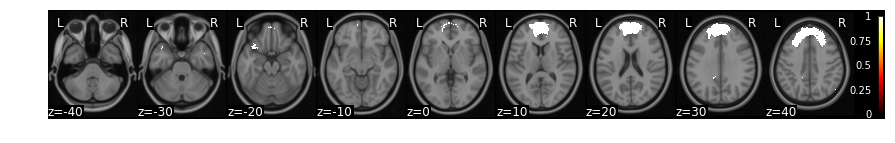

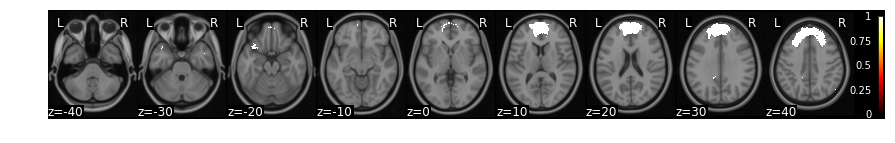

In [41]:
mask_x[2].plot()

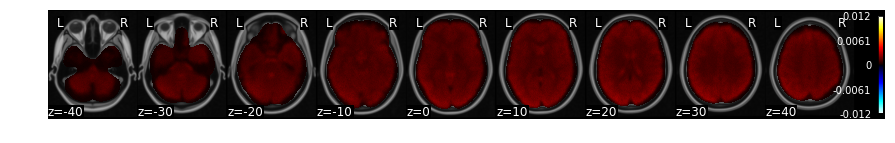

In [37]:
f = img1.mean().plot()

In [42]:
data_path = '/Users/finnes/Documents/SummerMIND/cmi_data/test_2subs/'
example_ni2 = os.path.join(data_path, 'errts.NDARBU607ZZ3.fanaticor.nii.gz')
img2 = Brain_Data(example_ni2)
img2

nltools.data.brain_data.Brain_Data(data=(250, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

# Mask image

In [44]:
img1_masked = img1.apply_mask(mask_x[2])
img2_masked = img2.apply_mask(mask_x[2])

# Functionally Align

In [48]:
# This code does the hyperalignment!
out = align([img1_masked,img2_masked], method='deterministic_srm',n_features=200)

In [61]:
out.keys()

dict_keys(['transformed', 'common_model', 'transformation_matrix'])

In [63]:
# This matrix is subjects x voxels x features (the number of which is set above)
np.shape(out['transformation_matrix'])

(2, 6376, 200)

In [67]:
np.shape(out['common_model'])

<bound method Brain_Data.shape of nltools.data.brain_data.Brain_Data(data=(250, 200), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])>

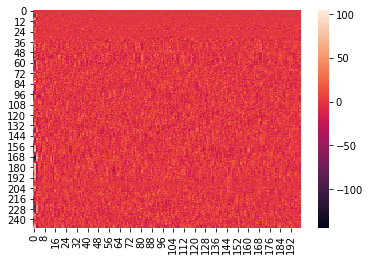

In [65]:
sns.heatmap(out['common_model'].data)

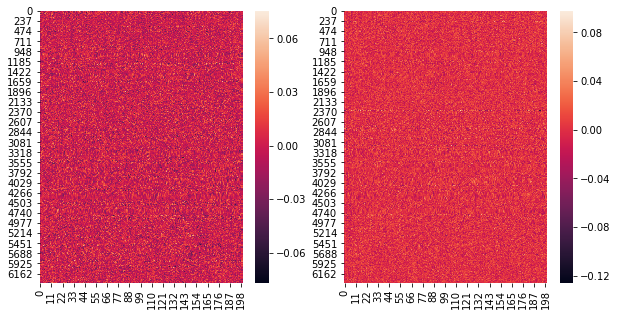

In [60]:
f,a = plt.subplots(ncols=2,figsize=(10,5))
for i,x in enumerate(out['transformation_matrix']):
    sns.heatmap(x,ax=a[i])

## Now let's try it for more than two subjects

In [70]:
top_dir = '/Users/finnes/Documents/SummerMIND/cmi_data/test_2subs/'
subj_list = ["NDARAN814UPR","NDARBU607ZZ3","NDARBX974XDR"]

nifti_imgs = []

for subj in subj_list:
    fname = ''.join([data_path, 'errts.', subj, '.fanaticor.nii.gz'])
    nifti_imgs.append(Brain_Data(fname))